### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

- 自变量：两个列表，第一个列表中的墨色和文字相同，第二个列表则是随机的
- 因变量：说出列表所有墨色所消耗的时间

（题目没说清楚的是，说出的墨色和实际墨色是否必须相同，即是否必须要说正确。我们假设是必须正确说出墨色的名称。）

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

- 假设集：文字条件一致组的平均反应时间与文字条件不一致组的平均反应时间是否相同
    - 数学变量定义 μ1 = 一致组的平均反应时间， μ2 = 不一致组的平均反应时间
    - 零假设：μ1 - u2 = 0
    - 备选假设
        - u1 - u2 > 0
        - 对立假设：u1 - u2 < 0

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
data = pd.read_csv('stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [2]:
a = data.Congruent
b = data.Incongruent
a.describe(), b.describe()

(count    24.000000
 mean     14.051125
 std       3.559358
 min       8.630000
 25%      11.895250
 50%      14.356500
 75%      16.200750
 max      22.328000
 Name: Congruent, dtype: float64, count    24.000000
 mean     22.015917
 std       4.797057
 min      15.687000
 25%      18.716750
 50%      21.017500
 75%      24.051500
 max      35.255000
 Name: Incongruent, dtype: float64)

一致文字条件里的平均值为14.05，标准差为3.56；不一致文字条件里的平均值为22.02，标准差为4.78。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

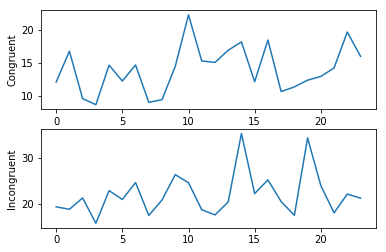

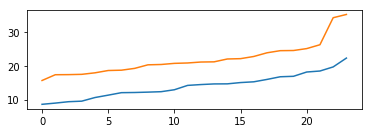

In [3]:
# 在这里创建可视化图表
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(211)
plt.plot(a)
plt.ylabel("Congruent")

plt.subplot(212)
plt.plot(b)
plt.ylabel("Incongruent")

plt.show()

plt.figure(2)
plt.subplot(211)
plt.plot(list(a.sort_values()))

#plt.subplot(212)
plt.plot(list(b.sort_values()))


plt.show()

通过将两组数据排序并画在同一副图中，不一致文字数据集显示出测试者花了更多的时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

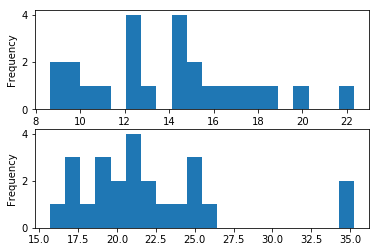

In [4]:
# 在这里执行统计检验
plt.subplot(211)
a.plot.hist(bins=20)

plt.subplot(212)
b.plot.hist(bins=20)
plt.show()


抽样的两个样本中，数量相同，方差不同。我们选用样本、方差皆不相等的t检验:

统计量 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e9b25d59b4bb7f954db64c4c93c1c5c9405ca0fa)

自由度 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/89849d7ecaf12a514d7a2a9f951b50fdced8715f)

In [5]:
print('a无偏', a.std(), a.var())
print('a有偏', a.values.std(), a.values.var())

print('b无偏', b.std(), b.var())
print('b有偏', b.values.std(), b.values.var())

a无偏 3.55935795765 12.6690290707
a有偏 3.48441571277 12.1411528594
b无偏 4.79705712247 23.0117570362
b有偏 4.69605513451 22.0529338264


由数据探索阶段可知：一致文字条件里的平均值为14.05，标准差为3.56；不一致文字条件里的平均值为22.02，标准差为4.78；样本大小均为24。

由上一步的计算结果知：一致文字条件的有偏方差为 12.14，不一致文字条件里的有偏方差为 22.05。

则统计量 t 的计算结果为 `14.04 - 22.02 - 0 / (12.14 / 24 + 22.05 / 24) = -7.98`

自由度为 `(12.14 / 24 + 22.05 / 24) ** 2 / ((12.14 / 24) ** 2 / (24 - 1) + (22.05 / 24) ** 2 / (24 - 1)) = 42.43`

通过查询t分布的表格知，自由度为40的t分布，t值小于3.551的为99.95%，也就是说t值大于3.551的概率是0.05%，由对称性可以推出t值小于-3.551的概率是0.05%。

而统计量t的结果为-7.98，在99.95%的置信水平下，此关键统计值位于拒绝域，因此零假设是错误的。

统计测试的结果与通过上面折线图观察得出的结果一致。

## 参考链接

- [假设检验 - 维基百科，自由的百科全书](https://zh.wikipedia.org/wiki/%E5%81%87%E8%A8%AD%E6%AA%A2%E5%AE%9A)
- [学生t检验 - 维基百科，自由的百科全书](https://zh.wikipedia.org/wiki/%E5%AD%B8%E7%94%9Ft%E6%AA%A2%E9%A9%97)
- [学生t-分布 - 维基百科，自由的百科全书](https://zh.wikipedia.org/wiki/%E5%AD%A6%E7%94%9Ft-%E5%88%86%E5%B8%83)
- 如何计算有偏方差 http://www.cnblogs.com/ligerleng/p/5484888.html
